In [32]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [33]:
from google.colab import drive
import pandas as pd

# Mount your Google Drive
drive.mount('/content/drive')

# Path to your file (adjust if stored elsewhere)
path ='/content/drive/My Drive/datasets/loan.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read Dataset

In [34]:
data = pd.read_csv(path)
print(data.head())
print("\n\nColumn Names\n\n")
print(data.columns)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

Label encode the target variable

In [35]:
#label encode the target variable
encode = LabelEncoder()
data.Loan_Status = encode.fit_transform(data.Loan_Status)

In [36]:
# drop the null values
data.dropna(how='any',inplace=True)

In [37]:
# train-test-split
train , test = train_test_split(data,test_size=0.2,random_state=0)

In [38]:
# seperate the target and independent variable
train_x = train.drop(columns=['Loan_ID','Loan_Status'],axis=1)
train_y = train['Loan_Status']

test_x = test.drop(columns=['Loan_ID','Loan_Status'],axis=1)
test_y = test['Loan_Status']

In [39]:
# encode the data
train_x = pd.get_dummies(train_x)
test_x  = pd.get_dummies(test_x)

print('shape of training data : ',train_x.shape)
print('shape of testing data : ',test_x.shape)

shape of training data :  (384, 20)
shape of testing data :  (96, 20)


In [40]:
# create the object of the model
model = LogisticRegression()

model.fit(train_x,train_y)

predict = model.predict(test_x)

print('Predicted Values on Test Data',predict)

print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(test_y,predict))

Predicted Values on Test Data [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1]


Accuracy Score on test data : 


0.7291666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


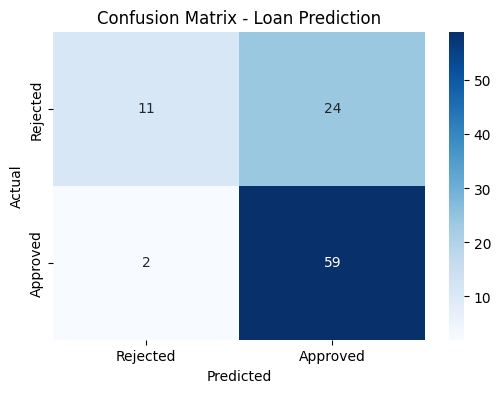

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ==============================
# Confusion Matrix Heatmap
# ==============================
cm = confusion_matrix(test_y, predict)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Rejected','Approved'], yticklabels=['Rejected','Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Loan Prediction")
plt.show()

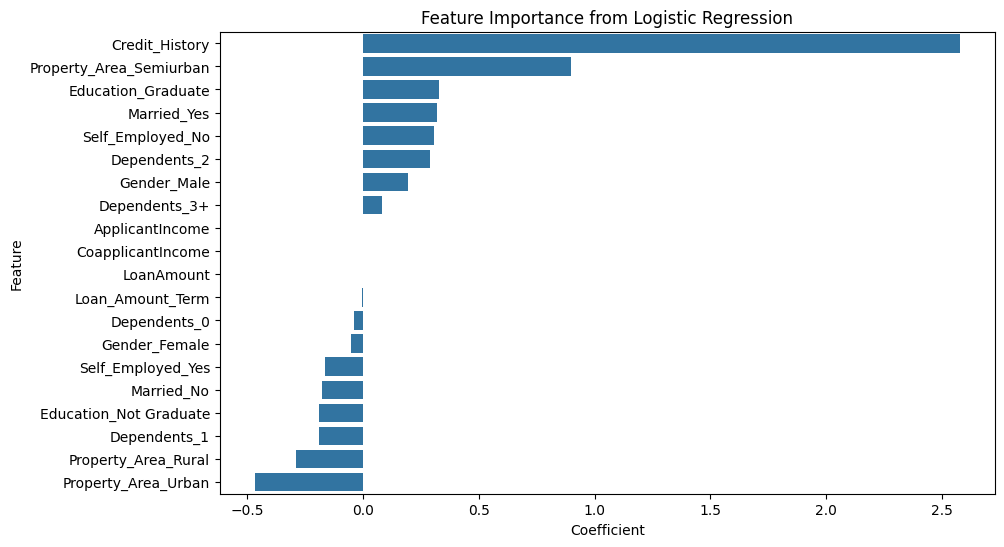

In [43]:
# ==============================
# Feature Importance (Coefficients)
# ==============================
# Align columns in test and train just in case
train_x, test_x = train_x.align(test_x, join='left', axis=1, fill_value=0)

coeff = model.coef_[0]
features = train_x.columns

coef_df = pd.DataFrame({"Feature": features, "Coefficient": coeff})
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Feature Importance from Logistic Regression")
plt.show()